<a href="https://colab.research.google.com/github/vgarcialopezm/ABC-SMC/blob/main/Approximations_to_day_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from scipy.stats import norm, uniform, multivariate_normal
from scipy.optimize import minimize
from scipy.special import logsumexp
import sys,ast
from math import exp
from math import log
from random import choices,seed,random
from tqdm import tqdm
#import p_tqdm
from functools import partial
import os
import matplotlib.pyplot as plt
from numpy import exp

In [19]:
datos = np.loadtxt('doblaredia3.txt', delimiter=',')
datos6=np.loadtxt('datosdia6.txt', delimiter=',')
datosdia9=np.loadtxt('datosdia9.txt', delimiter=',')
print(datosdia9)

[  5.7179   8.7232   8.7232   8.7232   8.7232   8.7232   8.7232   8.7232
   8.7232   8.7232   9.3191   9.5524  10.252   11.133   11.211   11.211
  11.211   11.211   11.211   11.211   11.211   11.211   11.211   11.211
  11.211   11.211   11.211   11.858   12.739   12.869   12.869   12.894
  13.698   13.827   14.527   14.295   13.698   13.698   14.474   15.357
  15.357   15.357   15.357   15.357   15.357   15.357   16.961   17.015
  17.015   17.015   17.195   17.612   17.299   18.18    19.061   19.503
  19.503   20.589   21.756   21.343   21.161   21.161   21.161   21.185
  21.99    21.99    22.35    23.648   23.648   23.648   23.648   23.648
  23.648   23.648   23.648   24.941   25.307   26.057   26.136   26.136
  26.06    25.562   27.145   28.026   29.19    28.942   26.965   27.842
  28.623   30.25    32.101   32.062   31.242   30.362   30.282   30.282
  30.509   32.642   33.016   37.377   38.574   38.574   38.187   37.306
  37.895   38.574   37.98    37.099   38.31    39.572   40.213 

In [9]:
taup=4800   #*deltat  #*deltat
beta1=2.5
a3H0=0.0085
d1=0.2
a0=0.45185
a1=0.51
a2=1
d2=0.1
e2f=1
#am=22446.951
beta=0.4980
#value of p6/p3 set to 1
p6p3=1
#c critico
# Calculate the value of c_cr using the parameters above and the expression given in the document
#ccr=1-1/beta1*np.log(1/a3H0*(a1+(a2*d2/d1*e2f)*(1-1/(1-a0))))
ccr=1.0-((1.0/beta1)*np.log((1/a3H0)*(a1+((a2*d2)/(d1*e2f))*(1-1/(1-a0/((p6p3)*(p6p3)))))));
#Calculate a(G1/S) using the parameter values above
# aG1S=am*(c/ccr-1)**(-beta)
#aG1S=2e+04
nu=0.00001097

#Let's apply Newton Raphson method in order to obtain the values of lambda given in the document (it will be named lam)
x0=0.001
max_iter=20
tolerance=0.000001

# #Expression of the function to obtain the value of lambda
# f=lambda lam:taup/2-(exp(-(lam+nu)*aG1S)/(lam+nu+1/taup))
  
# #Fist derivative of th previos function 
# Df=lambda lam:(exp(-(lam+nu)*aG1S)*(-aG1S*(lam+nu+1/taup)-1))/(lam+nu+1/taup)**2


In [53]:
def newton_rapsi(c,am,nu):
    #print('c',c)
        if c>ccr and c<0.78:
            aG1S=am*((c/ccr)-1)**(-beta)
        #else: 
        #  aG1S=10000000
            f=lambda lam:log(taup)-log(2)+lam*aG1S+nu*aG1S+log(lam+nu+1/taup)
  
    #Fist derivative of th previos function 
            Df=lambda lam: aG1S+1/(lam+nu+1/taup)
    #tabla = []
        
            
            section = abs(2*tolerance)
            xi = x0
            while (section>=tolerance):
                xnew = xi - f(xi)/Df(xi)
            #print('xi',xi)
                section  = abs(xnew-xi)
            #print('section',section)
        #tabla.append([xi,xnew,section])
                xi = xnew
        elif c>0.78:
           xi=ccr*c
        else:
            xi=-0.65
        return xi
#xi=newton_raps(c)


In [44]:
#spatial grid
L=191
dx=0.4819 #0.4819 #J/(L)
J=dx*L
#x_grid = np.array([l*dx for l in range(J)])
x_grid=np.linspace(0,J,L)
#L=np.size(x_grid)
#time grid
T=3 #3 #final time (3 days)
N=1000 #300  #501  #NUMBER OF TIME STEPS
dt=T/(N) #time step (it is almost every 130 secs. 2 minutes approximately)

#t_grid = np.array([t*dt for t in range(N)])
t_grid=np.linspace(0,T,N)
#n=np.array(100 for k in range(L))
#System parameters
delta=dx**2/dt
#2.446347282384288
#111.86992687185797
#18511.269877994026
#D_n=4.07944 #2.446347282384288  #2.#*delta
#D_c=109.02  #109.13154630#60 #*delta
#sigma_u=D_n*dt/(dx**2)
#sigma_v=D_c*dt/(dx**2)
#k1=1.45773318
k2=0.0942
#c=0.1
#beta_f=49.33  #THIS PARAMETER IS GIVEN, IT IS NOT NECESSARY TO ESTIMATE IT

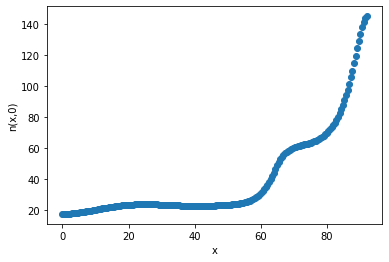

In [34]:
cells=np.array([ 17.31407869,  17.32268991,  17.34843893,  17.39107387,
        17.45018181,  17.5251988 ,  17.6154233 ,  17.72003246,
        17.83810062,  17.96861937,  18.11051823,  18.26268536,
        18.42398751,  18.59328849,  18.76946582,  18.95142476,
        19.1381099 ,  19.32851361,  19.52168188,  19.7167172 ,
        19.91277897,  20.10908175,  20.30489169,  20.49952157,
        20.69232512,  20.88269086,  21.0700362 ,  21.25380195,
        21.43344785,  21.60844929,  21.77829549,  21.9424892 ,
        22.10054806,  22.25200749,  22.39642497,  22.5333856 ,
        22.6625084 ,  22.7834534 ,  22.89592869,  22.99969737,
        23.09458381,  23.18047892,  23.25734391,  23.32521251,
        23.38419109,  23.43445685,  23.47625381,  23.50988681,
        23.53571365,  23.55413561,  23.56558682,  23.57052287,
        23.56940918,  23.56270962,  23.55087607,  23.53433922,
        23.51350121,  23.48873039,  23.46035856,  23.42868065,
        23.39395707,  23.35641838,  23.3162721 ,  23.27371137,
        23.22892476,  23.18210687,  23.13346892,  23.08324895,
        23.0317207 ,  22.97920094,  22.92605447,  22.87269671,
        22.81959331,  22.76725699,  22.71624133,  22.66713196,
        22.62053523,  22.5770649 ,  22.53732736,  22.50190596,
        22.47134506,  22.44613455,  22.42669538,  22.41336686,
        22.40639614,  22.40593056,  22.41201302,  22.42458099,
        22.44346907,  22.46841545,  22.49907206,  22.53501855,
        22.57577969,  22.62084618,  22.66969835,  22.72183251,
        22.7767895 ,  22.83418495,  22.89374094,  22.95531829,
        23.01894934,  23.08487045,  23.1535539 ,  23.2257387 ,
        23.30245992,  23.38507604,  23.47529415,  23.57519257,
        23.68724067,  23.81431577,  23.95971693,  24.12717561,
        24.32086321,  24.54539584,  24.80583637,  25.10769465,
        25.45692642,  25.85993189,  26.32355465,  26.85508038,
        27.46223363,  28.15316841,  28.9364474 ,  29.8210077 ,
        30.81612168,  31.93138363,  33.17678437,  34.56296668,
        36.10176503,  37.8071011 ,  39.69622164,  41.79114131,
        44.1200387 ,  46.71830685,  49.01115684,  51.0147216 ,
        52.75090973,  54.24533995,  55.52525872,  56.6177785 ,
        57.54862366,  58.34140829,  59.01735535,  59.59531727,
        60.09196495,  60.52204678,  60.89865957,  61.23350366,
        61.53711369,  61.81906446,  62.08815472,  62.35257134,
        62.62003659,  62.89794077,  63.19346322,  63.51368584,
        63.86570499,  64.25674954,  64.69431359,  65.18631085,
        65.74125276,  66.36844458,  67.07818593,  67.88195792,
        68.7677272 ,  69.74630269,  70.82975054,  72.03137956,
        73.36569611,  74.84833167,  76.49593524,  78.32601236,
        80.35668357,  82.60633004,  85.09309024,  87.83416742,
        90.84490238,  94.13755811,  97.71975187, 101.59245681,
       105.74747804, 110.16428872, 114.80609038, 119.61494256,
       124.5057946 , 129.35926035, 134.01302575, 138.25190505,
       141.79682577, 144.29351469, 145.302511  ])
plt.plot(x_grid, cells,'o')
plt.xlabel('x')
plt.ylabel('n(x,0)')
plt.show()

[  9.363   9.363  10.17   10.179  10.179  10.179  10.179  10.179  10.179
  10.179  10.179  10.847  11.81   11.81   11.81   11.81   11.81   11.81
  11.81   11.81   11.811  11.81   11.81   11.81   11.81   11.811  11.81
  11.81   11.81   11.811  11.81   12.091  12.625  12.625  12.625  12.625
  13.097  13.441  13.989  14.256  14.881  15.072  15.072  15.811  15.887
  15.887  15.072  15.148  15.887  15.887  16.078  16.703  16.437  16.192
  16.703  17.084  17.519  17.976  18.334  18.334  18.334  18.334  18.334
  18.334  18.334  19.858  19.965  19.92   18.334  18.334  18.334  18.685
  19.965  19.965  19.965  20.293  21.147  21.596  21.596  21.596  21.596
  21.596  22.191  23.678  24.043  24.752  24.859  24.859  24.859  24.859
  24.943  25.674  25.835  26.688  27.305  27.855  28.937  28.586  28.121
  28.548  29.867  31.575  32.199  31.619  31.383  32.039  32.199  32.199
  30.658  31.376  32.292  34.645  34.645  34.645  35.013  36.277  35.757
  34.645  34.982  35.835  37.101  38.358  38.235  37.

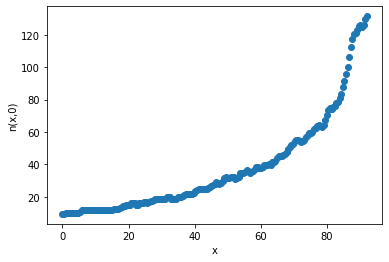

In [20]:
U = datos6 
print(U)
plt.plot(x_grid, U,'o')
plt.xlabel('x')
plt.ylabel('n(x,0)')
plt.show()


In [24]:
oxi=np.array([8.46832991e-07, 8.49345441e-07, 8.56900541e-07, 8.69551684e-07,
       8.87388357e-07, 9.10536891e-07, 9.39161510e-07, 9.73465704e-07,
       1.01369390e-06, 1.06013351e-06, 1.11311723e-06, 1.17302582e-06,
       1.24029114e-06, 1.31539967e-06, 1.39889642e-06, 1.49138924e-06,
       1.59355372e-06, 1.70613851e-06, 1.82997123e-06, 1.96596495e-06,
       2.11512540e-06, 2.27855875e-06, 2.45748025e-06, 2.65322361e-06,
       2.86725125e-06, 3.10116555e-06, 3.35672105e-06, 3.63583772e-06,
       3.94061543e-06, 4.27334965e-06, 4.63654841e-06, 5.03295080e-06,
       5.46554683e-06, 5.93759904e-06, 6.45266571e-06, 7.01462600e-06,
       7.62770702e-06, 8.29651295e-06, 9.02605652e-06, 9.82179279e-06,
       1.06896556e-05, 1.16360968e-05, 1.26681285e-05, 1.37933686e-05,
       1.50200897e-05, 1.63572720e-05, 1.78146605e-05, 1.94028264e-05,
       2.11332331e-05, 2.30183082e-05, 2.50715209e-05, 2.73074649e-05,
       2.97419487e-05, 3.23920929e-05, 3.52764342e-05, 3.84150388e-05,
       4.18296234e-05, 4.55436859e-05, 4.95826454e-05, 5.39739933e-05,
       5.87474550e-05, 6.39351633e-05, 6.95718446e-05, 7.56950185e-05,
       8.23452121e-05, 8.95661898e-05, 9.74052001e-05, 1.05913241e-04,
       1.15145348e-04, 1.25160900e-04, 1.36023953e-04, 1.47803605e-04,
       1.60574384e-04, 1.74416678e-04, 1.89417194e-04, 2.05669471e-04,
       2.23274427e-04, 2.42340966e-04, 2.62986636e-04, 2.85338353e-04,
       3.09533187e-04, 3.35719223e-04, 3.64056504e-04, 3.94718046e-04,
       4.27890959e-04, 4.63777649e-04, 5.02597130e-04, 5.44586442e-04,
       5.90002180e-04, 6.39122146e-04, 6.92247126e-04, 7.49702806e-04,
       8.11841822e-04, 8.79045976e-04, 9.51728606e-04, 1.03033715e-03,
       1.11535587e-03, 1.20730889e-03, 1.30676334e-03, 1.41433292e-03,
       1.53068171e-03, 1.65652840e-03, 1.79265095e-03, 1.93989177e-03,
       2.09916362e-03, 2.27145616e-03, 2.45784350e-03, 2.65949284e-03,
       2.87767441e-03, 3.11377312e-03, 3.36930201e-03, 3.64591816e-03,
       3.94544138e-03, 4.26987621e-03, 4.62143809e-03, 5.00258430e-03,
       5.41605071e-03, 5.86489560e-03, 6.35255172e-03, 6.88288839e-03,
       7.46028566e-03, 8.08972281e-03, 8.77688423e-03, 9.52828619e-03,
       1.03514287e-02, 1.12549776e-02, 1.22489837e-02, 1.33451462e-02,
       1.45571328e-02, 1.59009704e-02, 1.73955271e-02, 1.90631161e-02,
       2.09302609e-02, 2.30286763e-02, 2.53965358e-02, 2.80760848e-02,
       3.11142082e-02, 3.45631026e-02, 3.84810618e-02, 4.29333818e-02,
       4.79933965e-02, 5.37436529e-02, 6.02772439e-02, 6.76993159e-02,
       7.61287790e-02, 8.57002498e-02, 9.65662657e-02, 1.08899814e-01,
       1.22897232e-01, 1.38781533e-01, 1.56806247e-01, 1.77259851e-01,
       2.00470899e-01, 2.26813985e-01, 2.56716692e-01, 2.90667707e-01,
       3.29226338e-01, 3.73033707e-01, 4.22825965e-01, 4.79449949e-01,
       5.43881817e-01, 6.17249323e-01, 7.00858576e-01, 7.96226350e-01,
       9.05119288e-01, 1.02959595e+00, 1.17206204e+00, 1.33533779e+00,
       1.52274046e+00, 1.73818592e+00, 1.98631396e+00, 2.27264373e+00,
       2.60376703e+00, 2.98758969e+00, 3.43363364e+00, 3.95341619e+00,
       4.56092724e+00, 5.27323056e+00, 6.11122237e+00, 7.10058845e+00,
       8.27301075e+00, 9.66768544e+00, 1.13332254e+01, 1.33300294e+01,
       1.57332057e+01, 1.86361268e+01, 2.21546626e+01, 2.64320578e+01,
       3.16442624e+01, 3.80052384e+01, 4.57712742e+01])

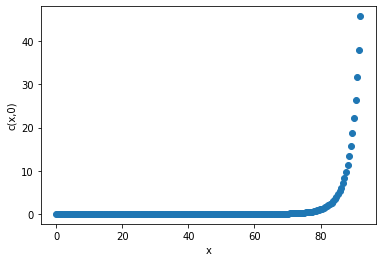

In [25]:
plt.plot(x_grid, oxi,'o')
plt.xlabel('x')
plt.ylabel('c(x,0)')
plt.show()

In [13]:
fu=lambda lamda_vect, Ui: lamda_vect*Ui

#aux=np.zeros(L)
#aux[-1]= 4*dx*beta_f*sigma_v
#aux[0]= 4*dx*betaf*sigma_v
g=lambda Ui,Vi,k1: -k1*(Ui*Vi)-k2*Vi   #+aux

In [39]:
def crank_nic(fu,g,Dn,Dc,a_m,U,L,k1,betaf):
    sigma_u=Dn*dt/(dx**2)
    sigma_v=Dc*dt/(dx**2)
    c_est=Dc*betaf/(L*(k1*np.mean(U)+k2))
    aux=np.zeros(L)
    aux[-1]= 4*dx*betaf*sigma_v
    
    V = oxi #np.array([c_est for i in range (0,L)])
    aux=np.zeros(L)
    aux[-1]= 4*dx*betaf*sigma_v
    #Matrices for Crank Nicholson in equation of population of cells
    A_n = np.diagflat([-sigma_u for i in range(L-2)]+[-2*sigma_u], -1) +\
      np.diagflat([2.+2.*sigma_u for i in range(L)]) +\
      np.diagflat([-2.*sigma_u]+[-sigma_u for i in range(L-2)], 1)
    
    B_n = np.diagflat([sigma_u for i in range(L-2)]+[2.*sigma_u], -1) +\
      np.diagflat([2.-2.*sigma_u for i in range(L)]) +\
      np.diagflat([2.*sigma_u]+[sigma_u for i in range(L-2)], 1)
    #Matrices for Crank Nicholson in equation of oxygen
    A_c = np.diagflat([-sigma_v for i in range(L-2)]+[-2*sigma_v], -1) +\
      np.diagflat([2.+2.*sigma_v for i in range(L)]) +\
      np.diagflat([-2.*sigma_v]+[-sigma_v for i in range(L-2)], 1)
    
    B_c = np.diagflat([sigma_v for i in range(L-2)]+[2.*sigma_v], -1) +\
      np.diagflat([2.-2.*sigma_v for i in range(L)]) +\
      np.diagflat([2.*sigma_v]+[sigma_v for i in range(L-2)], 1)
    
  
    
    for ti in range(1,N):
        lamda_vect=np.zeros(L)
        for i in range(L):
            xi=newton_rapsi(V[i],a_m,nu)
            lamda_vect[i]=xi #np.longfloat(xi)
        #print('step',ti)
        U_new = np.linalg.solve(A_n, (B_n @ U + dt*fu(lamda_vect,U)))
        V_new = np.linalg.solve(A_c, (B_c@V +dt*g(U,V,k1)+aux))
        lamda_vect=np.zeros(L)
        V = V_new
        #print(V_new)
        #for i in range(L):
        #    xi=newton_rapsi(V[i],a_m,nu)
        #    lamda_vect[i]=np.longfloat(xi)
        #print(lamda_vect)
        U = U_new
        #print(U_new)
    #print(V_new)
    return U,V 

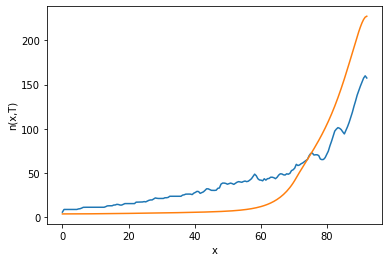

In [40]:
from traitlets.traitlets import CRegExp
plt.figure()
plt.plot(x_grid,datosdia9)
data2=np.array(crank_nic(fu,g,9.498282170234082,103.89180764534257, 28151.790141205438,U,L, 0.24070663341162185,19.451801766947774)).T
plt.plot(x_grid,data2[:,0])
plt.xlabel('x')
plt.ylabel('n(x,T)')
plt.show()


In [43]:
euc_disti(data2[:,0],datosdia9)

385.0690103603085

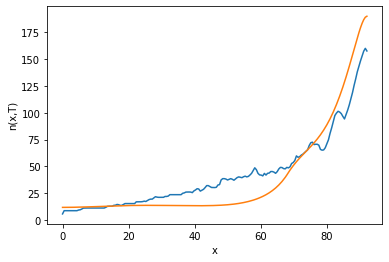

In [54]:
plt.figure()
plt.plot(x_grid,datosdia9)
data3=np.array(crank_nic(fu,g,9.498282170234082,103.89180764534257, 28151.790141205438,cells,L, 0.24070663341162185,19.451801766947774)).T
plt.plot(x_grid,data3[:,0])
plt.xlabel('x')
plt.ylabel('n(x,T)')
plt.show()

In [55]:
euc_disti(data3[:,0],datosdia9)

216.86360739570222

In [18]:
data2[:,0]

array([ 12.9746518 ,  12.97686375,  12.98349029,  12.99450356,
        13.00985729,  13.02948714,  13.05331103,  13.08122972,
        13.11312735,  13.14887219,  13.18831743,  13.23130205,
        13.27765179,  13.3271802 ,  13.3796897 ,  13.43497277,
        13.49281312,  13.55298691,  13.61526404,  13.67940937,
        13.74518407,  13.81234682,  13.88065515,  13.94986667,
        14.01974025,  14.0900373 ,  14.16052286,  14.23096673,
        14.30114451,  14.37083862,  14.43983923,  14.50794511,
        14.57496447,  14.64071565,  14.7050278 ,  14.76774143,
        14.82870897,  14.88779515,  14.94487736,  14.99984595,
        15.05260438,  15.10306943,  15.1511712 ,  15.1968531 ,
        15.24007182,  15.28079716,  15.31901185,  15.35471131,
        15.38790332,  15.41860773,  15.44685601,  15.47269086,
        15.49616575,  15.51734441,  15.53630033,  15.55311624,
        15.56788351,  15.58070167,  15.59167777,  15.60092587,
        15.60856646,  15.61472594,  15.61953605,  15.62

In [ ]:
def euc_dist(data1, data2):
    if np.shape(data1) != np.shape(data2):
        print ("\n the dimensions of the datasets are different (%s v.s. %s)\n" % (len(data1), len(data2)))
        sys.exit()
    else:
        z=np.array((data1 - data2)**2)
        distance = np.sum(z)
        #print('dist',data1 - data2)

    if distance < 0:
        return [None]
    elif np.isnan(distance):
        distance=100000
        return distance
    else:
        return distance

In [42]:
def euc_disti(data1, data2):
    if np.shape(data1) != np.shape(data2):
        print ("\n the dimensions of the datasets are different (%s v.s. %s)\n" % (len(data1), len(data2)))
        sys.exit()
    else:
        distance = np.linalg.norm(data1 - data2)
        #print('dist',data1 - data2)

    if distance < 0:
        return [None]
    else:
        return distance

In [ ]:
def prior():
### Generate a random parameter inside the limits stablished. The shape of the distribution can be changed if required
    prior = []
    for ipar,par in enumerate(params_tumor):
        prior.append(uniform.rvs(loc = par['lower_limit'],
                                 scale = par['upper_limit']-par['lower_limit'])) #par['upper_limit']))
        
       
    return prior